In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("Details1.csv")
df2 = pd.read_csv("Details2.csv")
df = df1.append(df2)
df.head(5)

,Unnamed: 0,Car_name,Making Year,Fuel_Type,Kms,Engine,No. of owners,Transmission,Price
0,0,Lexus NX 300h,2018,Petrol,"7,622 kms",2499 CC,First Owner,Automatic,63.95 Lakh*
1,1,Audi Q3 2.0 TDI,2013,Diesel,"67,000 kms",1968 CC,Third Owner,Automatic,13.5 Lakh*
2,2,Audi A6 2.0 TDI Premium Plus,2012,Diesel,"75,000 kms",1968 CC,Second Owner,Automatic,13.5 Lakh*
3,3,BMW 3 Series 320d Sport Line,2015,Diesel,"64,000 kms",1995 CC,First Owner,Automatic,22.75 Lakh*
4,4,BMW 7 Series 730Ld M Sport Plus,2013,Diesel,"65,000 kms",2993 CC,Second Owner,Automatic,27 Lakh*


In [3]:
df.shape

(5093, 9)

In [4]:
df.isnull().sum()

Unnamed: 0       0
Car_name         0
Making Year      0
Fuel_Type        0
Kms              0
Engine           0
No. of owners    0
Transmission     0
Price            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 0 to 1625
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5093 non-null   int64 
 1   Car_name       5093 non-null   object
 2   Making Year    5093 non-null   object
 3   Fuel_Type      5093 non-null   object
 4   Kms            5093 non-null   object
 5   Engine         5093 non-null   object
 6   No. of owners  5093 non-null   object
 7   Transmission   5093 non-null   object
 8   Price          5093 non-null   object
dtypes: int64(1), object(8)
memory usage: 397.9+ KB


#### All the columns are of type object

##### Dropping Unnamed: 0 as it is same as index

In [6]:
df = df.drop('Unnamed: 0',axis=1)
df.head(2)

,Car_name,Making Year,Fuel_Type,Kms,Engine,No. of owners,Transmission,Price
0,Lexus NX 300h,2018,Petrol,"7,622 kms",2499 CC,First Owner,Automatic,63.95 Lakh*
1,Audi Q3 2.0 TDI,2013,Diesel,"67,000 kms",1968 CC,Third Owner,Automatic,13.5 Lakh*


In [7]:
df['Kms'] = df['Kms'].apply(lambda x : x.split(' ')[0])

In [8]:
df['Engine'] = df['Engine'].apply(lambda x : x.split(' ')[0])
df['Price'] = df['Price'].apply(lambda x: x.split(' ')[0])

In [9]:
# Taking the company name from the car name
df['Company'] = df['Car_name'].apply(lambda x : x.split(' ')[0])
df = df.drop('Car_name',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 0 to 1625
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Making Year    5093 non-null   object
 1   Fuel_Type      5093 non-null   object
 2   Kms            5093 non-null   object
 3   Engine         5093 non-null   object
 4   No. of owners  5093 non-null   object
 5   Transmission   5093 non-null   object
 6   Price          5093 non-null   object
 7   Company        5093 non-null   object
dtypes: object(8)
memory usage: 358.1+ KB


In [11]:
df['Company'].unique()

array(['Lexus', 'Audi', 'BMW', 'Mercedes-Benz', 'Maruti', 'Honda',
       'Mahindra', 'Hyundai', 'Renault', 'Toyota', 'Jaguar', 'Skoda',
       'Chevrolet', 'Datsun', 'Ford', 'Tata', 'Volkswagen', 'Porsche',
       'Premier', 'Volvo', 'Mitsubishi', 'Jeep', 'Land', 'Kia', 'Fiat',
       'MG', 'Nissan', 'Force', 'New', 'Ambassador', 'Mini', 'OpelCorsa',
       'Isuzu'], dtype=object)

In [12]:
#Converting Price to Numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Price'].astype(str))
df['Price'] = le.transform(df['Price'].astype(str))

In [13]:
#Similarly converting Engine, Making year and kms covered to numerical datatype
le.fit(df['Engine'].astype(str))
df['Engine'] = le.transform(df['Engine'].astype(str))
le.fit(df['Making Year'].astype(str))
df['Making Year'] = le.transform(df['Making Year'].astype(str))
le.fit(df['Kms'].astype(str))
df['Kms'] = le.transform(df['Kms'].astype(str))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 0 to 1625
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Making Year    5093 non-null   int32 
 1   Fuel_Type      5093 non-null   object
 2   Kms            5093 non-null   int32 
 3   Engine         5093 non-null   int32 
 4   No. of owners  5093 non-null   object
 5   Transmission   5093 non-null   object
 6   Price          5093 non-null   int32 
 7   Company        5093 non-null   object
dtypes: int32(4), object(4)
memory usage: 278.5+ KB


### EDA

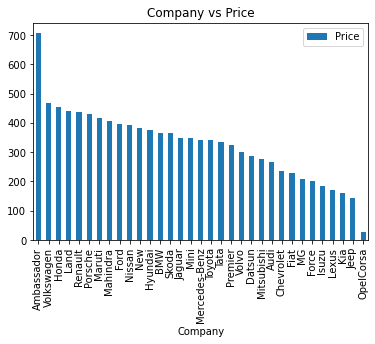

In [15]:
data = pd.DataFrame(df.groupby(['Company'])['Price'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('Company vs Price')
plt.show()

#### Ambassador is having high price followed by Volkswagen and Honda

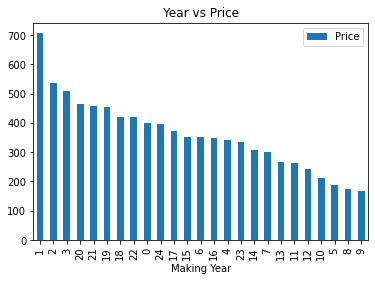

In [16]:
data1 = pd.DataFrame(df.groupby(['Making Year'])['Price'].mean().sort_values(ascending = False))
data1.plot.bar()
plt.title('Year vs Price')
plt.show()

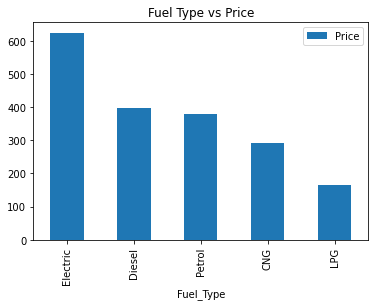

In [17]:
data2 = pd.DataFrame(df.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
data2.plot.bar()
plt.title('Fuel Type vs Price')
plt.show()

#### Electric cars have more price followed by Diesel and petrol

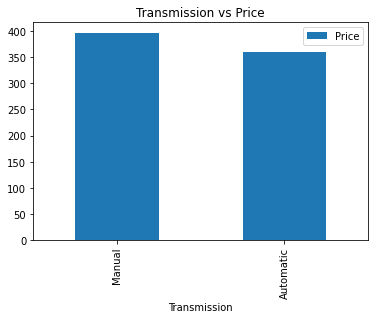

In [18]:
data = pd.DataFrame(df.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('Transmission vs Price')
plt.show()

#### There is not much price difference between Manual and Automatic cars

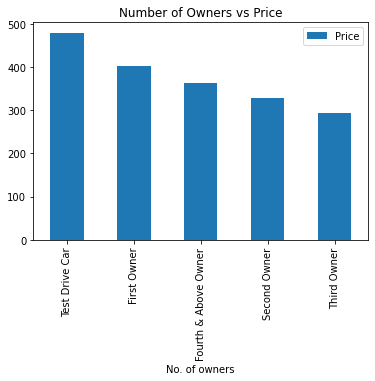

In [19]:
data = pd.DataFrame(df.groupby(['No. of owners'])['Price'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('Number of Owners vs Price')
plt.show()

#### Test Drive cars have more price followed by first owner

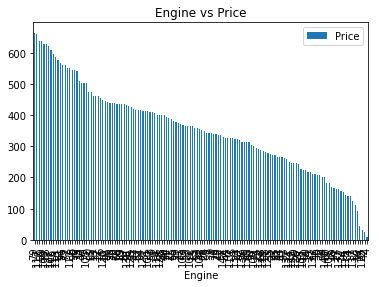

In [20]:
data = pd.DataFrame(df.groupby(['Engine'])['Price'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('Engine vs Price')
plt.show()

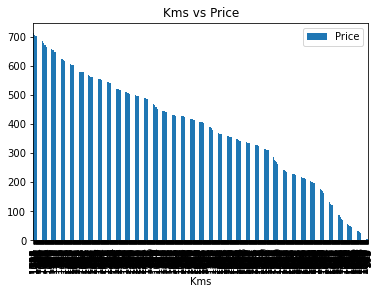

In [21]:
data = pd.DataFrame(df.groupby(['Kms'])['Price'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('Kms vs Price')
plt.show()

In [22]:
#Seperating categorical columns and numerical columns
cat_col = [column for column in df.columns if df[column].dtype=='object']
cat_col

['Fuel_Type', 'No. of owners', 'Transmission', 'Company']

In [23]:
cont_col = [column for column in df.columns if df[column].dtype!='object']
cont_col

['Making Year', 'Kms', 'Engine', 'Price']

#### Applying Onehot encoding technique for Company

In [24]:
categorical = df[cat_col]

In [25]:
Company=pd.get_dummies(categorical[['Fuel_Type']],drop_first=True)

#### Using Label Encoding techniques for other columns

In [26]:
lab_enc = LabelEncoder()
for i in ['Company','No. of owners','Transmission']:
    categorical[i]=lab_enc.fit_transform(categorical[i])

#### Concatenating altogether

In [27]:
df = pd.concat([categorical,Company,df[cont_col]],axis=1)
df.head(3)

,Fuel_Type,No. of owners,Transmission,Company,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Making Year,Kms,Engine,Price
0,Petrol,0,0,15,0,0,0,1,21,982,90,586
1,Diesel,4,0,1,1,0,0,0,16,937,58,109
2,Diesel,2,0,1,1,0,0,0,15,1058,58,109


#### Dropping Company as i have applied Onehot encoding technique in that

In [28]:
df = df.drop('Company',axis=1)
df.head(3)

,Fuel_Type,No. of owners,Transmission,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Making Year,Kms,Engine,Price
0,Petrol,0,0,0,0,0,1,21,982,90,586
1,Diesel,4,0,1,0,0,0,16,937,58,109
2,Diesel,2,0,1,0,0,0,15,1058,58,109


In [28]:
df = df.drop('Fuel_Type',axis=1)

In [29]:
df.shape

(5093, 11)

#### Checking for the Price distribution

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

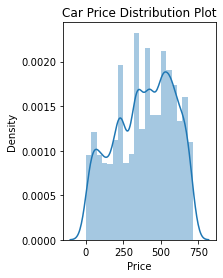

In [30]:
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

#### The distribution doesn't seems to be like a normal one

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='Price'>

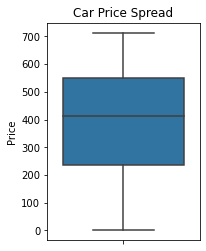

In [31]:
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)

#### There are no outliers

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 0 to 1625
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   No. of owners       5093 non-null   int32
 1   Transmission        5093 non-null   int32
 2   Company             5093 non-null   int32
 3   Fuel_Type_Diesel    5093 non-null   uint8
 4   Fuel_Type_Electric  5093 non-null   uint8
 5   Fuel_Type_LPG       5093 non-null   uint8
 6   Fuel_Type_Petrol    5093 non-null   uint8
 7   Making Year         5093 non-null   int32
 8   Kms                 5093 non-null   int32
 9   Engine              5093 non-null   int32
 10  Price               5093 non-null   int32
dtypes: int32(7), uint8(4)
memory usage: 198.9 KB


#### Checking the correlation

In [33]:
df.corr()

,No. of owners,Transmission,Company,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Making Year,Kms,Engine,Price
No. of owners,1.000000,-0.017593,-0.052185,-0.040835,-0.006668,0.011449,0.032317,-0.336954,0.062579,0.027668,-0.159384
Transmission,-0.017593,1.000000,0.099617,-0.073875,-0.022223,0.030645,0.063900,-0.157345,0.025700,-0.175254,0.087231
Company,-0.052185,0.099617,1.000000,0.096160,0.002310,-0.008786,-0.096794,0.016102,-0.027272,0.097405,0.044565
Fuel_Type_Diesel,-0.040835,-0.073875,0.096160,1.000000,-0.014682,-0.050914,-0.982818,0.077285,0.089302,0.003806,0.052371
Fuel_Type_Electric,-0.006668,-0.022223,0.002310,-0.014682,1.000000,-0.000681,-0.013146,0.013616,-0.004873,0.027232,0.017275
Fuel_Type_LPG,0.011449,0.030645,-0.008786,-0.050914,-0.000681,1.000000,-0.045589,-0.074548,0.018663,-0.001907,-0.056055
Fuel_Type_Petrol,0.032317,0.063900,-0.096794,-0.982818,-0.013146,-0.045589,1.000000,-0.069121,-0.092343,-0.014241,-0.041327
Making Year,-0.336954,-0.157345,0.016102,0.077285,0.013616,-0.074548,-0.069121,1.000000,-0.145974,-0.057336,0.298158
Kms,0.062579,0.025700,-0.027272,0.089302,-0.004873,0.018663,-0.092343,-0.145974,1.000000,-0.052449,-0.043813
Engine,0.027668,-0.175254,0.097405,0.003806,0.027232,-0.001907,-0.014241,-0.057336,-0.052449,1.000000,-0.191370


#### Making Year, Engine and No.of owners are highly correlated with our target variable

#### Visualizing Correlation

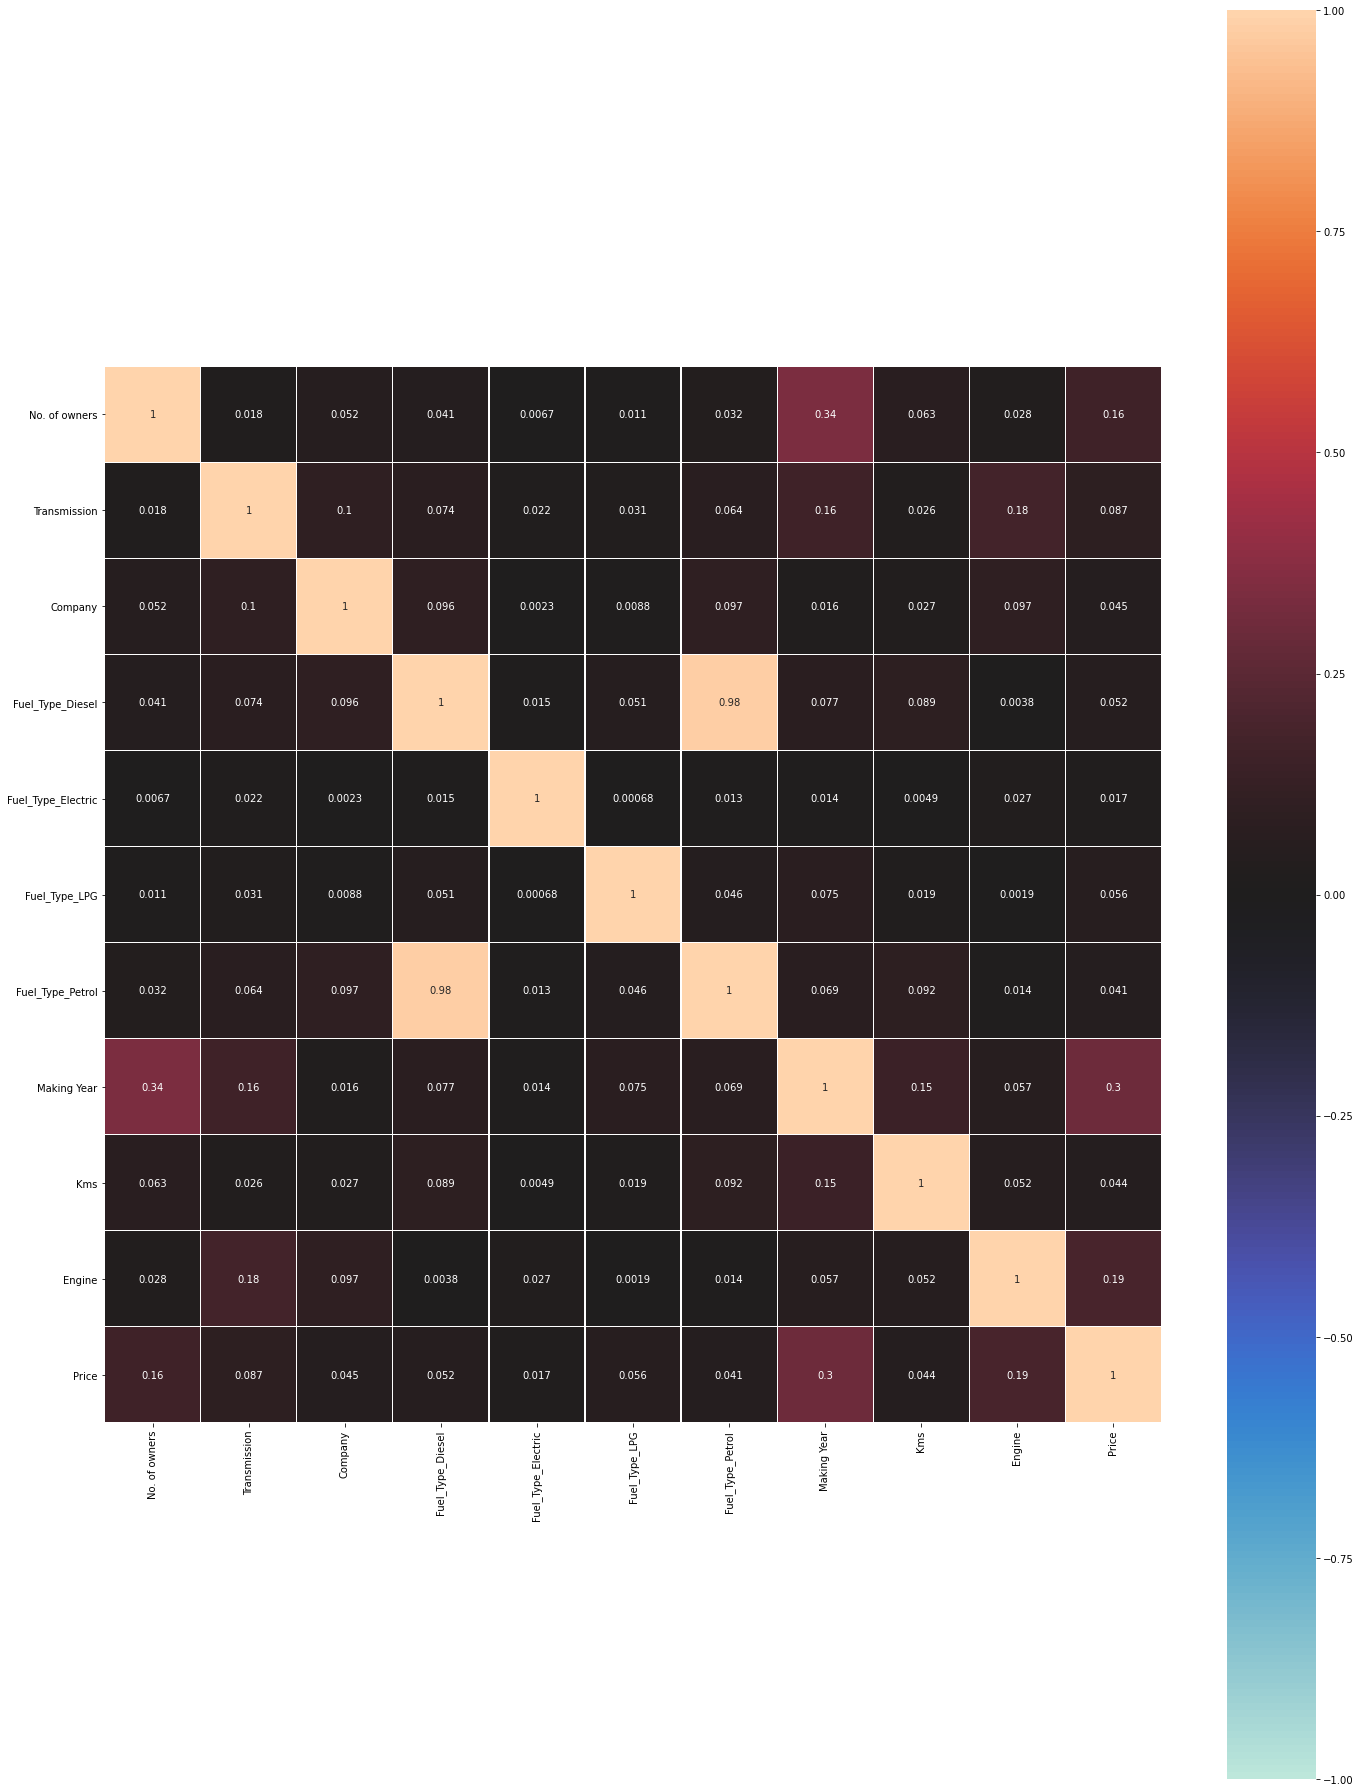

In [34]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Multicollinearity is not that prominent in the dataset

#### Statistical Analysis

In [35]:
df.describe()

,No. of owners,Transmission,Company,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Making Year,Kms,Engine,Price
count,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000
mean,0.445906,0.715492,15.569213,0.523267,0.000196,0.002356,0.468093,17.445317,697.623208,48.338504,387.092873
std,0.937181,0.451224,8.680332,0.499507,0.014012,0.048488,0.499030,3.658809,346.913515,40.483664,192.204259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,15.000000,421.000000,13.000000,236.000000
50%,0.000000,1.000000,17.000000,1.000000,0.000000,0.000000,0.000000,18.000000,750.000000,37.000000,413.000000
75%,0.000000,1.000000,19.000000,1.000000,0.000000,0.000000,1.000000,20.000000,957.000000,71.000000,550.000000
max,4.000000,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1302.000000,141.000000,713.000000


#### Checking for outliers by visualizing

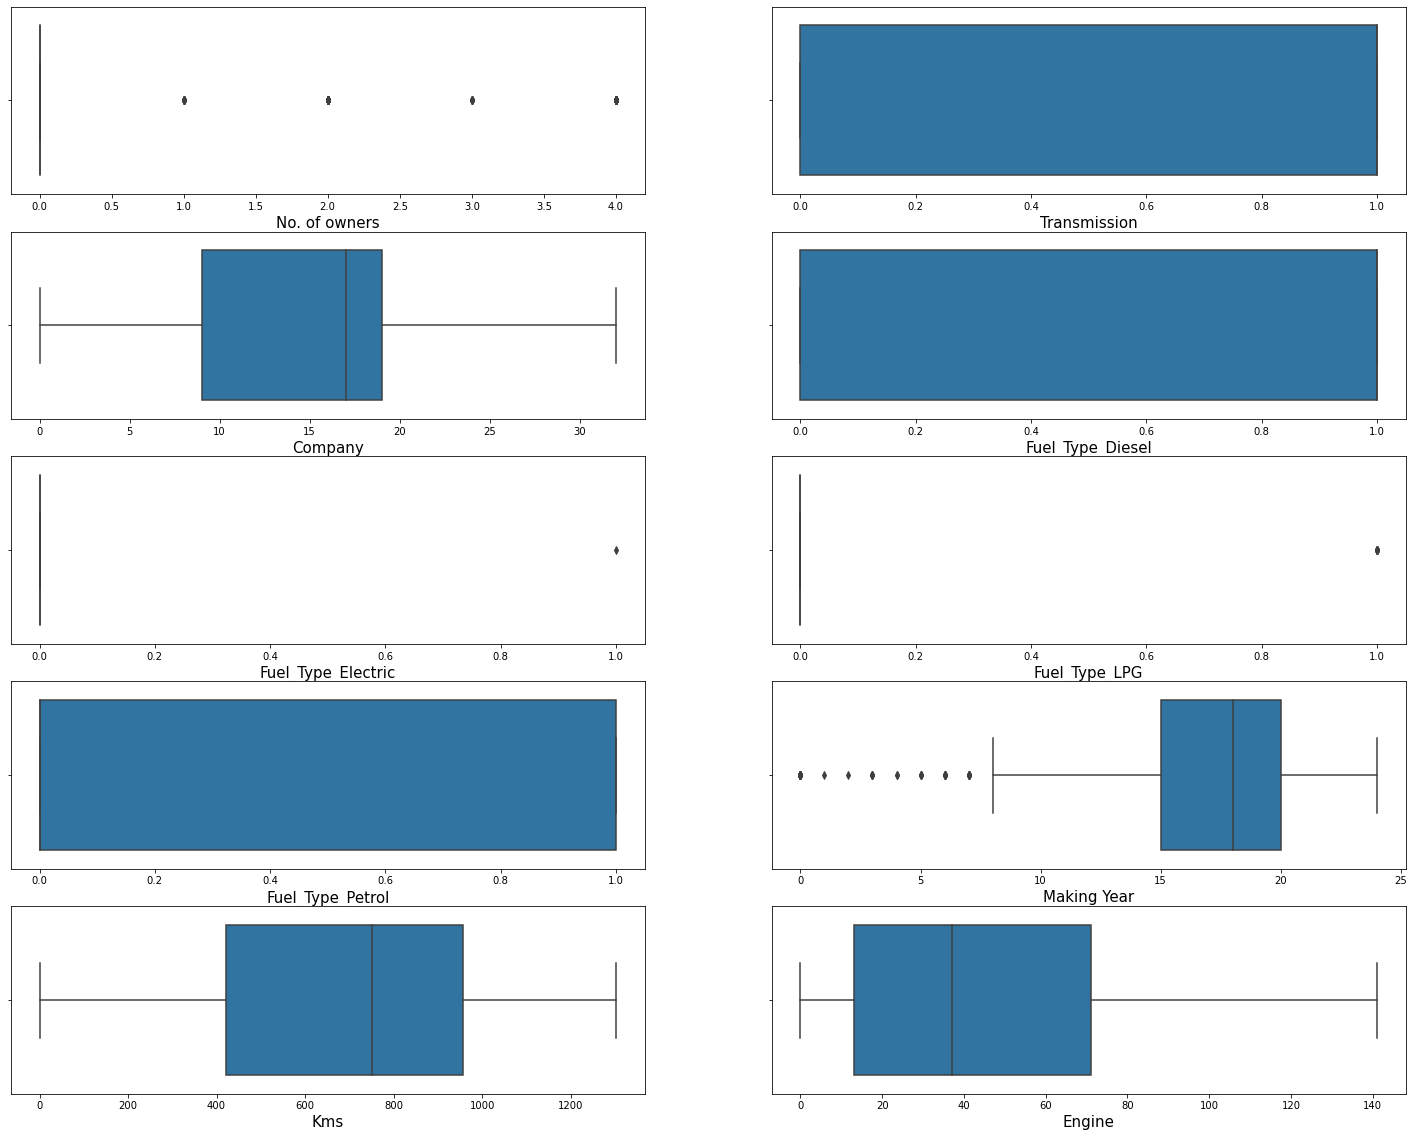

In [36]:
plt.figure(figsize=(25,20))
gr = 1
for column in df:
    if gr<=10:
        ax = plt.subplot(5,2,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Outliers exists in the dataset

In [37]:
df.skew()

No. of owners          1.985012
Transmission          -0.955518
Company                0.340917
Fuel_Type_Diesel      -0.093197
Fuel_Type_Electric    71.365258
Fuel_Type_LPG         20.534541
Fuel_Type_Petrol       0.127924
Making Year           -1.046335
Kms                   -0.241188
Engine                 0.904526
Price                 -0.259592
dtype: float64

#### Dataset is skewed

#### Removing Outliers by z-score method

In [38]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (5093, 11)
[[0.47584175 1.58582402 0.06558142 ... 0.81981446 1.02919506 1.03497529]
 [3.79269551 1.58582402 1.67858132 ... 0.69008639 0.23867516 1.4470032 ]
 [1.65842688 1.58582402 1.67858132 ... 1.03891074 0.23867516 1.4470032 ]
 ...
 [0.47584175 0.63058699 0.87208137 ... 0.95601859 0.30480728 0.66554033]
 [0.47584175 0.63058699 1.66263275 ... 1.72285559 0.72477098 1.48245988]
 [0.47584175 1.58582402 0.39527569 ... 0.15099422 0.18926766 0.07332957]]
Row numbers :  [   1   21   49   52   58   76   80   80   81  106  156  216  270  321
  345  352  377  387  426  431  449  513  555  564  570  593  624  630
  635  638  801  891  943 1119 1134 1141 1192 1200 1320 1340 1382 1399
 1400 1408 1420 1423 1425 1451 1460 1464 1492 1528 1529 1530 1546 1569
 1573 1574 1575 1576 1577 1578 1579 1580 1580 1581 1581 1582 1583 1584
 1585 1586 1587 1588 1589 1589 1590 1591 1592 1593 1594 1595 1595 1596
 1657 1726 1956 1960 2085 2095 2130 2180 2187 2292 2486 2486 2504 2516
 2537 2542 2544 2544

In [39]:
loss = (5093-4820)/5093*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  5.360298448851364 % of data


#### Data loss is acceptable

#### Splitting the dataset into train and test

In [40]:
x = df1.drop("Price",axis=1)
y = df1['Price']

In [41]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.46832082, -1.58205783,  0.05107972, ...,  1.05646698,
         0.82596936,  1.08473478],
       [ 2.13610443, -1.58205783, -2.15442969, ..., -0.88670424,
         1.03138059,  0.55994303],
       [-0.46832082, -1.58205783, -1.90176574, ..., -0.00483987,
         0.574784  ,  0.65557457],
       ...,
       [-0.46832082,  0.63208815, -0.83662922, ..., -0.31849022,
        -0.9305312 ,  0.03588032],
       [-0.46832082,  0.63208815,  1.50406016, ..., -0.00483987,
        -1.79231384, -0.59524368],
       [-0.46832082, -1.58205783,  0.48155634, ...,  1.05646698,
         0.18651497,  0.5197925 ]])

In [42]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

No. of owners         1.667518
Transmission         -0.950265
Company              -0.090460
Fuel_Type_Diesel     -0.105574
Fuel_Type_Electric    0.000000
Fuel_Type_LPG         0.000000
Fuel_Type_Petrol      0.128938
Making Year          -0.115199
Kms                  -0.352946
Engine               -0.048033
dtype: float64

#### Scaling x

In [43]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

#### Finding the Best random State

In [44]:
from sklearn.linear_model import LinearRegression
max_score = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = lr.score(x_train,y_train)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.16046413907949242 when 103 is the random state


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 103)

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset =  0.16046413907949242
Score in testing dataset =  0.058714588919677624
MAE is :  145.39842282406954
MSE is : 33456.78838013178
RMSE is : 182.91196893623933


In [47]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  0.9935155779492361
Score in testing dataset is  0.12239294137453993
MAE is :  99.61040110650069
MSE is : 31193.42262793914
RMSE is : 176.61659782687227


In [48]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9255234996973594
Score in testing dataset is  0.478839885049976
MAE is :  87.45684993683128
MSE is : 18523.97102175019
RMSE is : 136.102795789617


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in testing dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.4712548906373619
Score in testing dataset is  0.3487615486069858
MAE is :  113.00229746535499
MSE is : 23147.43944480571
RMSE is : 152.14282580787602


In [50]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in testing dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Score in training dataset is  0.19501589539245112
Score in testing dataset is  0.12097468564170821
MAE is :  138.88074109599197
MSE is : 31243.832717550325
RMSE is : 176.75925072694307


In [51]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in testing dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("R2 score is : ",r2_score(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.8715440894952742
Score in testing dataset is  0.4618991600318365
MAE is :  92.96718980306412
MSE is : 19126.10746757845
R2 score is :  0.4618991600318365
RMSE is : 138.29717085890965


In [52]:
cvs = cross_val_score(lr,X_scaled,y,cv=5,scoring='r2')
cvs = np.mean(cvs)
print("Cross validation score of Linear Regression model is : ",cvs)

Cross validation score of Linear Regression model is :  0.12348857959668451


In [53]:
cvs = cross_val_score(dt,X_scaled,y,cv=5,scoring='r2')
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  -0.04762967481048941


In [54]:
cvs = cross_val_score(rf,X_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  0.383618011356279


In [55]:
cvs = cross_val_score(gbr,X_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of GradientBoostingRegressor model is : ",cvs)

Cross validation score of GradientBoostingRegressor model is :  0.35648352544111805


In [56]:
cvs = cross_val_score(svr,X_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of SVR model is : ",cvs)

Cross validation score of SVR model is :  0.17162144572462965


In [57]:
cvs = cross_val_score(xgbr,X_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of XGBRegressor model is : ",cvs)

Cross validation score of XGBRegressor model is :  0.3677303105448445


#### Taking XGBoost Regressor as the best model as the difference is low

#### Hyper Parameter Tuning

In [58]:
params = {'learning_rate':np.arange(0.05,0.23),
          'n_estimators':[10,80,10],
          'max_depth':[2,10,2],
          'min_samples_leaf':[1,10,2]
         }
grid = GridSearchCV(estimator = xgbr,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[11:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Parameters are 
 {'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 80}


In [59]:
gbr = XGBRegressor(learning_rate=0.06,max_depth=10,min_samples_leaf=1,n_estimators=80)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in testing dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("R2 score is : ",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

[11:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Score in training dataset is  0.8813979593133476
Score in testing dataset is  0.48311695726880377
MAE is :  88.55054732041735
MSE is : 18371.947949441415
R2 score is :  0.48311695726880377
RMSE is : 135.54315899167105


#### After HPT accuracy increased to 46.79%

##### Saving File

In [60]:
filename = 'Used Car Price Prediction.pkl'
pickle.dump(xgbr,open(filename,'wb'))